# Vehical Price prediction (Regression Problem)

### This algorithm will take vehical details like mileage,engine type ,number of doors,length,width,height,engine capacity etc...

In [1]:
import pandas as pd

## Step 1: Load the data

In [2]:
df = pd.read_csv('auto.txt')
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


## Step 2: Clean the data

### in the below data where ever we are having ? replacing this by using numpy NaN 

In [3]:
import numpy as np

df = df.replace('?',np.nan)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [4]:
df.dtypes  # checking all column datatype

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [5]:
df['price'] = pd.to_numeric(df['price'],errors='coerce')
df['horsepower'] = pd.to_numeric(df['horsepower'],errors='coerce')
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'],errors='coerce')
df['bore'] = pd.to_numeric(df['bore'],errors='coerce')
df['stroke'] = pd.to_numeric(df['stroke'],errors = 'coerce')

### Remove unwanted columns from the dataframe 

In [6]:
df = df.drop('normalized-losses',axis=1)
df.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# 

### Convert all the strings into integer value 

In [7]:
eng_loc = {
    'front':1,
    'rear':2
}
df['engine-location'].replace(eng_loc,inplace=True)
df['engine-location']=pd.to_numeric(df['engine-location'])

In [8]:
dict = {
    'one':1,
    'two':2,
    'three':3,
    'four':4,
    'five':5,
    'six':6,
    'seven':7,
    'eight':8,
    'nine':9,
    'ten':10,
    'twelve':12
}
df['num-of-cylinders'].replace(dict,inplace=True)
df['num-of-cylinders'] = pd.to_numeric(df['num-of-cylinders'])

In [9]:
df['num-of-cylinders']

0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: num-of-cylinders, Length: 205, dtype: int64

In [10]:
df.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [11]:
make_car = {
	'alfa-romero':1,
	'audi':2,
	'bmw':3,
	'chevrolet':4,
	'dodge':5,
	'honda':6,
	'isuzu':7,
	'jaguar':8,
	'mazda':9,
	'mercedes-benz':10,
	'mercury':11,
	'mitsubishi':12,
	'nissan':13,
	'peugot':14,
	'plymouth':15,
	'porsche':16,
	'renault':17,
	'saab' :18,
	'subaru':19,
	'toyota':20,
	'volkswagen':21,
	'volvo':22
}
df['make'].replace(make_car,inplace=True)
df['make'] = pd.to_numeric(df['make'])

In [12]:
df.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [13]:
df.aspiration

0        std
1        std
2        std
3        std
4        std
       ...  
200      std
201    turbo
202      std
203    turbo
204    turbo
Name: aspiration, Length: 205, dtype: object

In [14]:
asp_car={
    'std':1,
    'turbo':2
}
df['aspiration'].replace(asp_car,inplace=True)
df['aspiration'] = pd.to_numeric(df['aspiration'])

In [15]:
num_doors = {
    'four':4,
    'two':2
}
df['num-of-doors'].replace(num_doors,inplace=True)
df['num-of-doors'] = pd.to_numeric(df['num-of-doors'])

In [16]:
df['body-style'].head(100).unique

<bound method Series.unique of 0     convertible
1     convertible
2       hatchback
3           sedan
4           sedan
         ...     
95      hatchback
96          sedan
97          wagon
98        hardtop
99      hatchback
Name: body-style, Length: 100, dtype: object>

In [17]:
body_style = {
    'convertible':1,
    'hardtop':2,
    'hatchback':3,    
    'sedan':4, 
    'wagon':5,
}
df['body-style'].replace(body_style,inplace=True)
df['body-style'] = pd.to_numeric(df['body-style'])

In [18]:
drive_wheels = {
    '4wd':1,
    'fwd':2,
    'rwd':3
}
df['drive-wheels'].replace(drive_wheels,inplace=True)
df['drive-wheels'] = pd.to_numeric(df['drive-wheels'])

In [19]:
engine_type = {
    'dohc':1,
    'dohcv':2,
    'l':3,
    'ohc':4,
    'ohcf':5,
    'ohcv':6,
    'rotor':7
}
df['engine-type'].replace(engine_type,inplace=True)
df['engine-type'] = pd.to_numeric(df['engine-type'])

In [20]:
fule_sys = {
    '1bbl':1,
    '2bbl':2,
    '4bbl':4,
    'idi':5,
    'mfi':6,
    'mpfi':7,
    'spdi':8,
    'spfi':9
}
df['fuel-system'].replace(fule_sys,inplace=True)
df['fuel-system'] = pd.to_numeric(df['fuel-system'])

In [21]:
fuel_type = {
    'gas':1,
    'diesel':2
}
df['fuel-type'].replace(fuel_type,inplace=True)
df['fuel-type'] = pd.to_numeric(df['fuel-type'])

### Filling NaN values

In [22]:
df.isna().sum()   # Checking are we having any nan values or not

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

<!-- num_mean = df['num-of-doors'].mean()
bore_mean = df['bore'].mean()
stroke_mean = df['stroke'].mean()
horse_mean = df['horsepower'].mean()
peak_mean = df['peak-rpm'].mean()
price_mean =  df['price'].mean()
fillna_dict = {
    'num-of-doors' : num_mean,
    'bore' : bore_mean,
    'stroke' : stroke_mean,
    'horsepower': horse_mean,
    'peak-rpm' : peak_mean,
    'price' :price_mean
}


df.fillna(fillna_dict,inplace=True) -->

In [23]:
df = df.dropna()  # dropping a rows if it is having Nan Values
df

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,1,1,1,2.0,1,3,1,88.6,168.8,...,130,7,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,1,1,1,2.0,1,3,1,88.6,168.8,...,130,7,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,1,1,1,2.0,3,3,1,94.5,171.2,...,152,7,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,2,1,1,4.0,4,2,1,99.8,176.6,...,109,7,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,2,1,1,4.0,4,1,1,99.4,176.6,...,136,7,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,22,1,1,4.0,4,3,1,109.1,188.8,...,141,7,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,22,1,2,4.0,4,3,1,109.1,188.8,...,141,7,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,22,1,1,4.0,4,3,1,109.1,188.8,...,173,7,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,22,2,2,4.0,4,3,1,109.1,188.8,...,145,5,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [24]:
df.drop(['horsepower','curb-weight','peak-rpm','length'],inplace=True,axis=1)

## Step 3: Splitting the data for train and test

<h3> Spliting a model </h3>

In [25]:
from sklearn.model_selection import train_test_split
# lets feed our data to machine learning model
x = df.drop('price', axis=1)

y = df['price']

# split data into 80% for training, 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)

<h3> Training a model </h3>

### 1) Linear regression algorithm 

In [26]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

# x_train.dtypes
linear_model.fit(x_train,y_train)

LinearRegression()

<h3> Testing a model </h3>

In [27]:
linear_model.score(x_test,y_test)

0.8053252432527668

In [28]:
linear_model.coef_

array([  -485.17314331,   -250.7559084 , -11801.82099388,   3764.18358122,
         -133.25126718,   -593.07502116,    951.14518723,  11259.36027751,
          -85.49045638,    940.423207  ,    524.39886704,   -312.72928842,
          853.10642786,    125.64454498,    143.76786825,     74.13473638,
        -3809.74696763,    826.48628989,   -281.60037791,    342.4294112 ])

In [29]:
predict = x_train.columns
coef = pd.Series(linear_model.coef_,predict).sort_values()
print(coef)

fuel-type           -11801.820994
stroke               -3809.746968
body-style            -593.075021
symboling             -485.173143
engine-type           -312.729288
city-mpg              -281.600378
make                  -250.755908
num-of-doors          -133.251267
wheel-base             -85.490456
bore                    74.134736
engine-size            125.644545
fuel-system            143.767868
highway-mpg            342.429411
height                 524.398867
compression-ratio      826.486290
num-of-cylinders       853.106428
width                  940.423207
drive-wheels           951.145187
aspiration            3764.183581
engine-location      11259.360278
dtype: float64


### Testing a model

In [30]:
y_predict = linear_model.predict(x_test)

Populating the interactive namespace from numpy and matplotlib


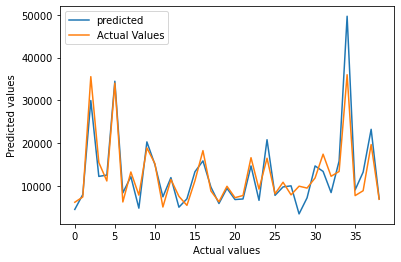

In [31]:
import matplotlib.pyplot as plt
%pylab inline
# pylab.rcParams['figure.figsize'] = (15,10)
plt.plot(y_predict,label='predicted')
plt.plot(y_test.values,label='Actual Values' )
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()

### Finding errors  in in this algorithm 

In [32]:
from sklearn.metrics import mean_squared_error

lmodel_mse =  mean_squared_error(y_predict,y_test)
math.sqrt(lmodel_mse)

3347.3029035941527

<p style="font-size:20px"> In this algorithm error is mor.In regression problem if <b>error is less</b> that is the best algorithm</p>

### 2) Lasso Algorithm 

In [33]:
from sklearn.linear_model  import Lasso

lass_model = Lasso(alpha=0.5,normalize=True)
lass_model.fit(x_train,y_train)

c:\users\hp\appdata\local\programs\python\python39-32\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Lasso(alpha=0.5, normalize=True)

In [34]:
lass_predict  = lass_model.predict(x_test)
lass_model.score(x_test,y_test)

0.8253087573554785

In [35]:
lass_mod_mse = mean_squared_error(lass_predict,y_test)
math.sqrt(lass_mod_mse)

3170.850461070983

### 3) Ridge Algorithm 

In [36]:
from sklearn.linear_model import Ridge

rmodel = Ridge()
rmodel.fit(x_train,y_train)

Ridge()

In [37]:
rpredict = rmodel.predict(x_test)
print(rmodel.score(x_test,y_test))
rmodel_mse = mean_squared_error(rpredict,y_test)
print( math.sqrt(rmodel_mse))

0.8191838392220101
3225.958794221145
